## 引入套件

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 需將資料編碼從ascii 改成utf-8 不然無法讀取中文字

In [2]:
cancer_data = pd.read_csv('../data/1979_2017.csv', error_bad_lines=False )

In [3]:
cancer_data.head(5)

,Year,Gender,Country,Cancer,WHO2000,Count,AgeAvg,AgeMed,IncidenceRate
0,1979,全,台閩地區,口腔、口咽及下咽,3.40,439,53.37,55.0,2.50
1,1979,全,台閩地區,主唾液腺,0.36,49,46.67,47.0,0.28
2,1979,全,台閩地區,鼻咽,7.73,1047,46.82,47.0,5.97
3,1979,全,台閩地區,食道,3.16,377,59.23,59.0,2.15
4,1979,全,台閩地區,胃,12.09,1471,57.39,59.0,8.39


In [4]:
cancer_data=cancer_data.drop(['WHO2000','Count','AgeAvg','AgeMed'], axis=1)

In [5]:
cancer_list = cancer_data['Cancer'].unique()
cancer_list

array(['口腔、口咽及下咽', '主唾液腺', '鼻咽', '食道', '胃', '小腸', '結直腸', '肝及肝內膽管',
       '膽囊及肝外膽管', '胰', '後腹膜腔及腹膜', '消化器官其他分界不明部位', '鼻腔、中耳及副鼻竇', '喉',
       '肺、支氣管及氣管', '胸膜', '胸腺、心臟與中隔', '骨、關節及關節軟骨', '結締組織、皮下組織及其他軟組織', '皮膚',
       '膀胱', '腎', '腎盂及其他泌尿系統', '眼及淚腺', '腦', '其他神經系統', '甲狀腺', '其他內分泌腺',
       '其他分界不明的部位', '不明原發部位', '何杰金氏淋巴瘤', '白血病', '非何杰金氏淋巴瘤', '漿細胞瘤', '全癌症',
       '男性乳房', '攝護腺', '睪丸', '其他男性生殖器官', '女性乳房', '子宮', '子宮頸', '子宮體',
       '卵巢、輸卵管及寬韌帶', '其他女性生殖器官', '呼吸系統與胸內器官之其他分界不明部位'], dtype=object)

In [6]:
gender = cancer_data['Gender'].unique()

In [7]:
gender

array(['全', '男', '女'], dtype=object)

In [8]:
index = 0
for cancer in cancer_list:
    TT=cancer_data.loc[(cancer_data['Gender']==gender[1]) &  
        (cancer_data['Cancer']==cancer)].groupby(['Country']).mean()
    TT=TT.drop(['Year'], axis=1)
    TT.rename(columns = {'IncidenceRate': cancer}, inplace=True)
    if (index==0):
        result = TT
    else:
        result=result.join(TT)
    index=index+1
    
result=result.fillna(0)
result=result.drop(['全癌症','女性乳房', '子宮', '子宮頸', '子宮體', '卵巢、輸卵管及寬韌帶', '其他女性生殖器官',],axis=1)

In [9]:
result

,口腔、口咽及下咽,主唾液腺,鼻咽,食道,胃,小腸,結直腸,肝及肝內膽管,膽囊及肝外膽管,胰,...,不明原發部位,何杰金氏淋巴瘤,白血病,非何杰金氏淋巴瘤,漿細胞瘤,男性乳房,攝護腺,睪丸,其他男性生殖器官,呼吸系統與胸內器官之其他分界不明部位
Country,,,,,,,,,,,,,,,,,,,,,
南投縣,36.071795,0.934000,8.243846,11.202821,13.692308,1.207941,34.293846,41.295641,2.574211,4.557949,...,3.521944,0.828571,5.714359,4.962105,1.741875,0.360714,19.153590,0.990323,0.750357,0.000000
台中市,25.933590,0.698056,8.478205,10.462821,15.327692,1.096154,34.098974,39.332051,2.283333,4.277436,...,3.132821,0.560278,5.548205,4.827632,1.333333,0.279333,17.533846,1.147949,0.588205,0.085000
台北市,17.271538,0.915641,8.539487,8.446410,25.740256,1.039744,45.228974,40.326923,2.883333,6.600000,...,3.860769,0.642051,7.203077,7.201538,1.702564,0.339459,28.110256,1.122821,0.813077,0.000000
台南市,24.616154,0.792162,8.800256,7.812564,14.348462,1.229474,40.925128,54.529487,2.862308,5.115897,...,3.537949,0.497838,6.120256,5.515897,1.505833,0.261250,18.200769,0.777632,0.638421,0.110000
台東縣,46.498718,1.554643,11.331026,17.028462,23.161538,1.779310,32.652051,42.047692,3.465000,4.821351,...,4.230769,1.242308,5.576316,5.590000,1.455484,0.827000,16.139474,1.362692,1.343000,0.000000
台閩地區,27.456154,0.783846,8.989744,10.220769,18.076154,1.080513,37.503333,44.419231,2.523590,5.059231,...,3.613333,0.544359,6.099231,5.376410,1.448205,0.241026,18.480769,0.979487,0.657949,0.013333
嘉義市,34.853684,1.509200,7.853077,10.096842,15.058462,2.092083,41.711026,65.251026,3.409032,5.747027,...,4.031667,1.149474,6.169459,6.094412,1.756296,0.946250,17.487105,1.371818,1.332381,0.000000
嘉義縣,42.072051,1.073437,8.052308,12.873077,14.428718,1.627105,40.023333,66.173846,3.174474,5.263590,...,4.322308,0.670455,6.216667,5.270000,2.072188,0.497500,17.814359,0.945312,0.824412,0.000000
基隆市,21.162821,1.348667,9.428718,12.863077,27.981538,1.241563,39.224359,47.908462,2.604324,5.448947,...,4.500256,0.996500,6.241053,5.745000,1.869677,0.775000,17.836316,1.449375,0.892258,0.000000


### matplotlib 顯示中文字型(Windosw系統)
要顯示中文，需要特別處理。上網查資料後，最簡單的做法，
1. 從 windows/Fonts/ 目錄，將微軟正黑(Microsoft JhengHei UI)複製到 matplotlib 的字型目錄裡(site-packages/matplotlib/mpl-data/fonts/ttf)，
2. 將 msjh.ttc改名為 DejaVuSans.ttf
3. 重啟Python

C:\Users\q8977\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\q8977\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


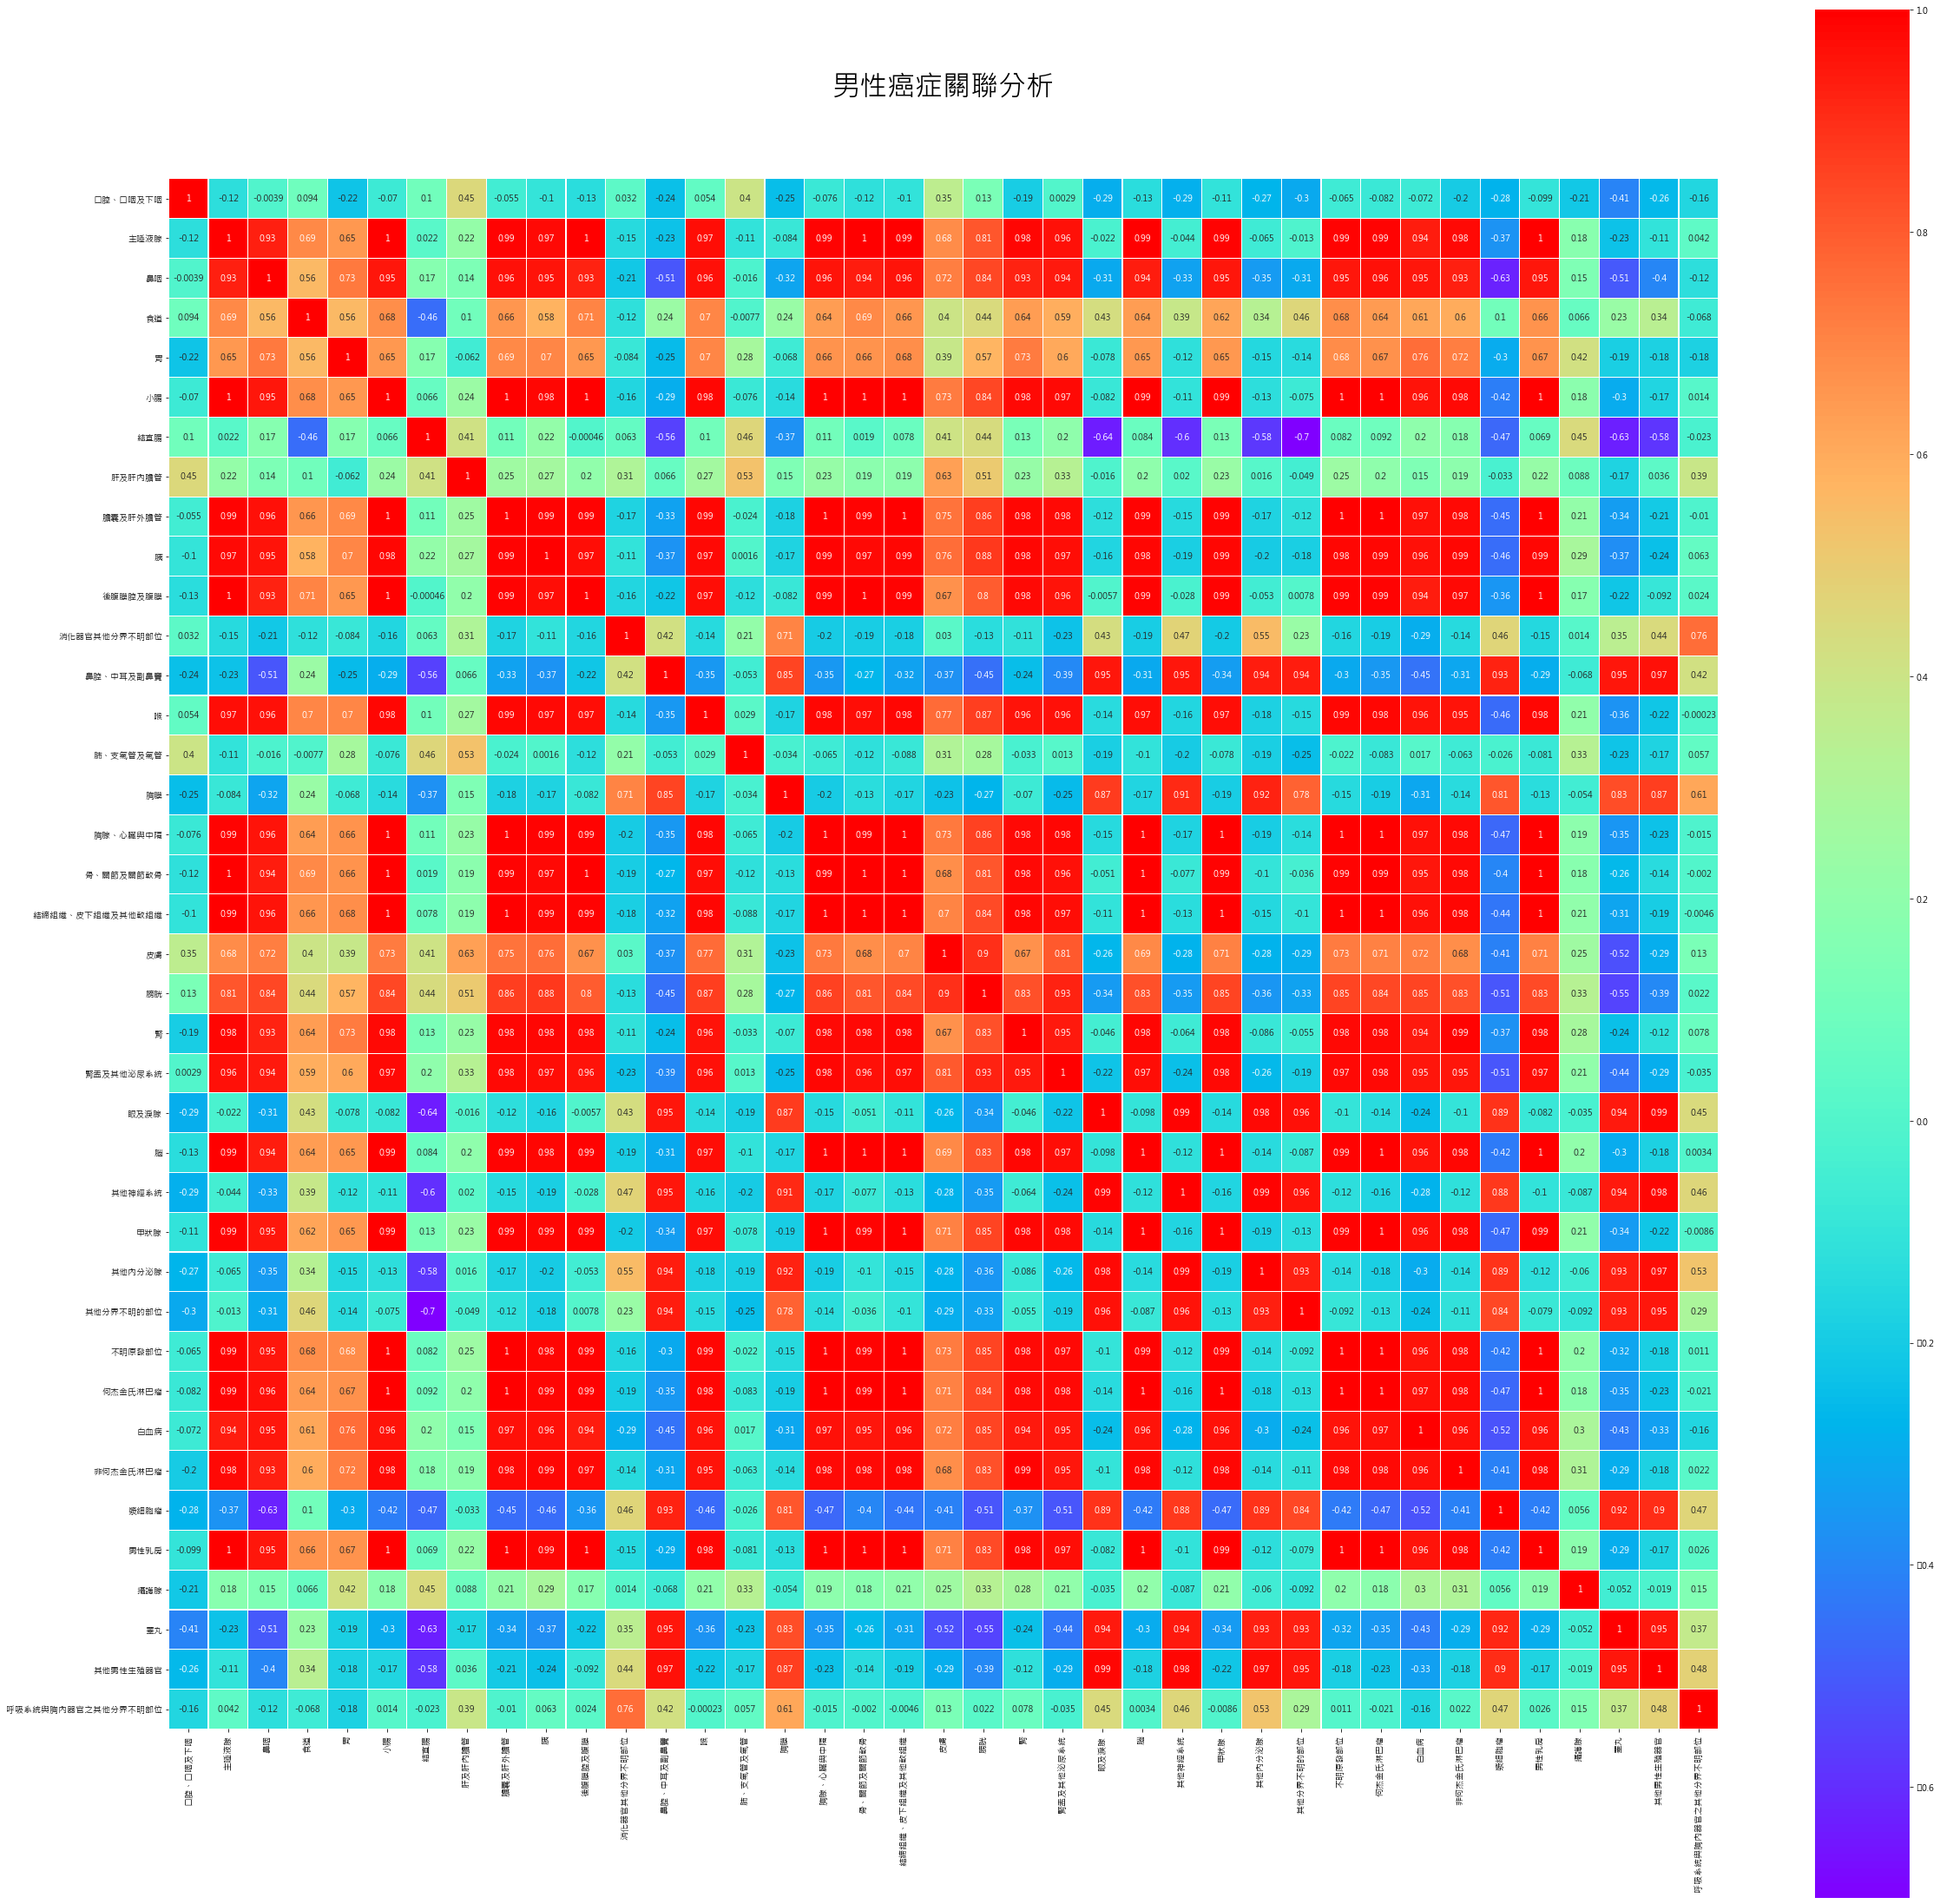

In [10]:
colormap = plt.cm.rainbow
plt.figure(figsize=(40,40))
plt.title('男性癌症關聯分析', y=1.05, size=32)
sns.heatmap(result.astype(float).corr(),linewidths=0.1,vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.savefig('../img/male_cancer_cor.png')

In [11]:
index = 0
for cancer in cancer_list:
    TT=cancer_data.loc[(cancer_data['Gender']==gender[2]) &  
        (cancer_data['Cancer']==cancer)].groupby(['Country']).mean()
    TT=TT.drop(['Year'], axis=1)
    TT.rename(columns = {'IncidenceRate': cancer}, inplace=True)
    if (index==0):
        result = TT
    else:
        result=result.join(TT)
    index=index+1
    
result=result.fillna(0)
result=result.drop(['全癌症','男性乳房','攝護腺', '睪丸', '其他男性生殖器官',],axis=1)
result

,口腔、口咽及下咽,主唾液腺,鼻咽,食道,胃,小腸,結直腸,肝及肝內膽管,膽囊及肝外膽管,胰,...,白血病,非何杰金氏淋巴瘤,漿細胞瘤,女性乳房,子宮,子宮頸,子宮體,卵巢、輸卵管及寬韌帶,其他女性生殖器官,呼吸系統與胸內器官之其他分界不明部位
Country,,,,,,,,,,,,,,,,,,,,,
南投縣,3.238919,0.865357,3.009487,0.855312,7.915897,1.153000,26.687692,15.848205,2.871176,3.577838,...,4.485897,4.360556,1.761034,36.763077,0.710909,20.382051,7.282162,5.520000,1.378611,0.39
台中市,2.461026,0.604359,3.198462,0.790263,8.055641,0.797778,26.617179,15.321282,1.972051,3.314103,...,4.296667,3.625000,0.944444,44.834615,0.265161,19.998974,7.205128,6.186154,1.027179,0.08
台北市,2.950000,0.693333,3.213846,1.090000,13.017692,0.790513,34.095385,14.730000,2.507179,4.711795,...,4.830256,5.336410,1.232632,64.211026,0.227813,19.959744,9.960513,8.897692,1.114103,0.00
台南市,2.195641,0.741389,3.305385,0.609714,8.493590,0.861389,31.939744,22.840513,2.922895,3.953784,...,4.575641,4.482222,0.926857,43.633846,0.343810,17.836667,7.375385,6.663333,0.992105,0.00
台東縣,11.220000,1.440625,5.068205,3.428684,11.588205,1.543333,20.728462,18.049487,2.943529,4.374412,...,3.675405,4.499032,1.765600,33.786154,1.082857,18.562051,7.249211,5.828947,1.561250,0.00
台閩地區,2.847436,0.622564,3.374359,0.891538,9.381282,0.766923,28.696410,17.160256,2.331282,3.687436,...,4.409487,4.028462,0.996923,45.877692,0.195128,20.291795,7.469744,6.581795,1.069231,0.01
嘉義市,3.096471,1.245417,3.014054,1.174500,8.894737,1.362632,32.009487,33.043684,2.664706,4.952059,...,3.955789,5.052000,1.780455,49.316410,0.771667,19.079487,7.781579,7.770811,1.413077,0.00
嘉義縣,3.014737,0.741538,3.195897,0.805333,9.207436,1.310000,34.072564,29.199231,3.207568,4.604706,...,4.603846,4.738286,1.333667,34.738205,0.549412,19.389231,6.296216,5.803684,1.228571,0.00
基隆市,3.280278,0.818929,3.704615,1.721081,12.324872,1.188261,29.914615,20.755385,2.838000,5.125588,...,4.237436,4.741143,1.301538,49.772821,0.633636,25.335128,8.818378,7.587105,1.375263,0.52


C:\Users\q8977\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\q8977\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


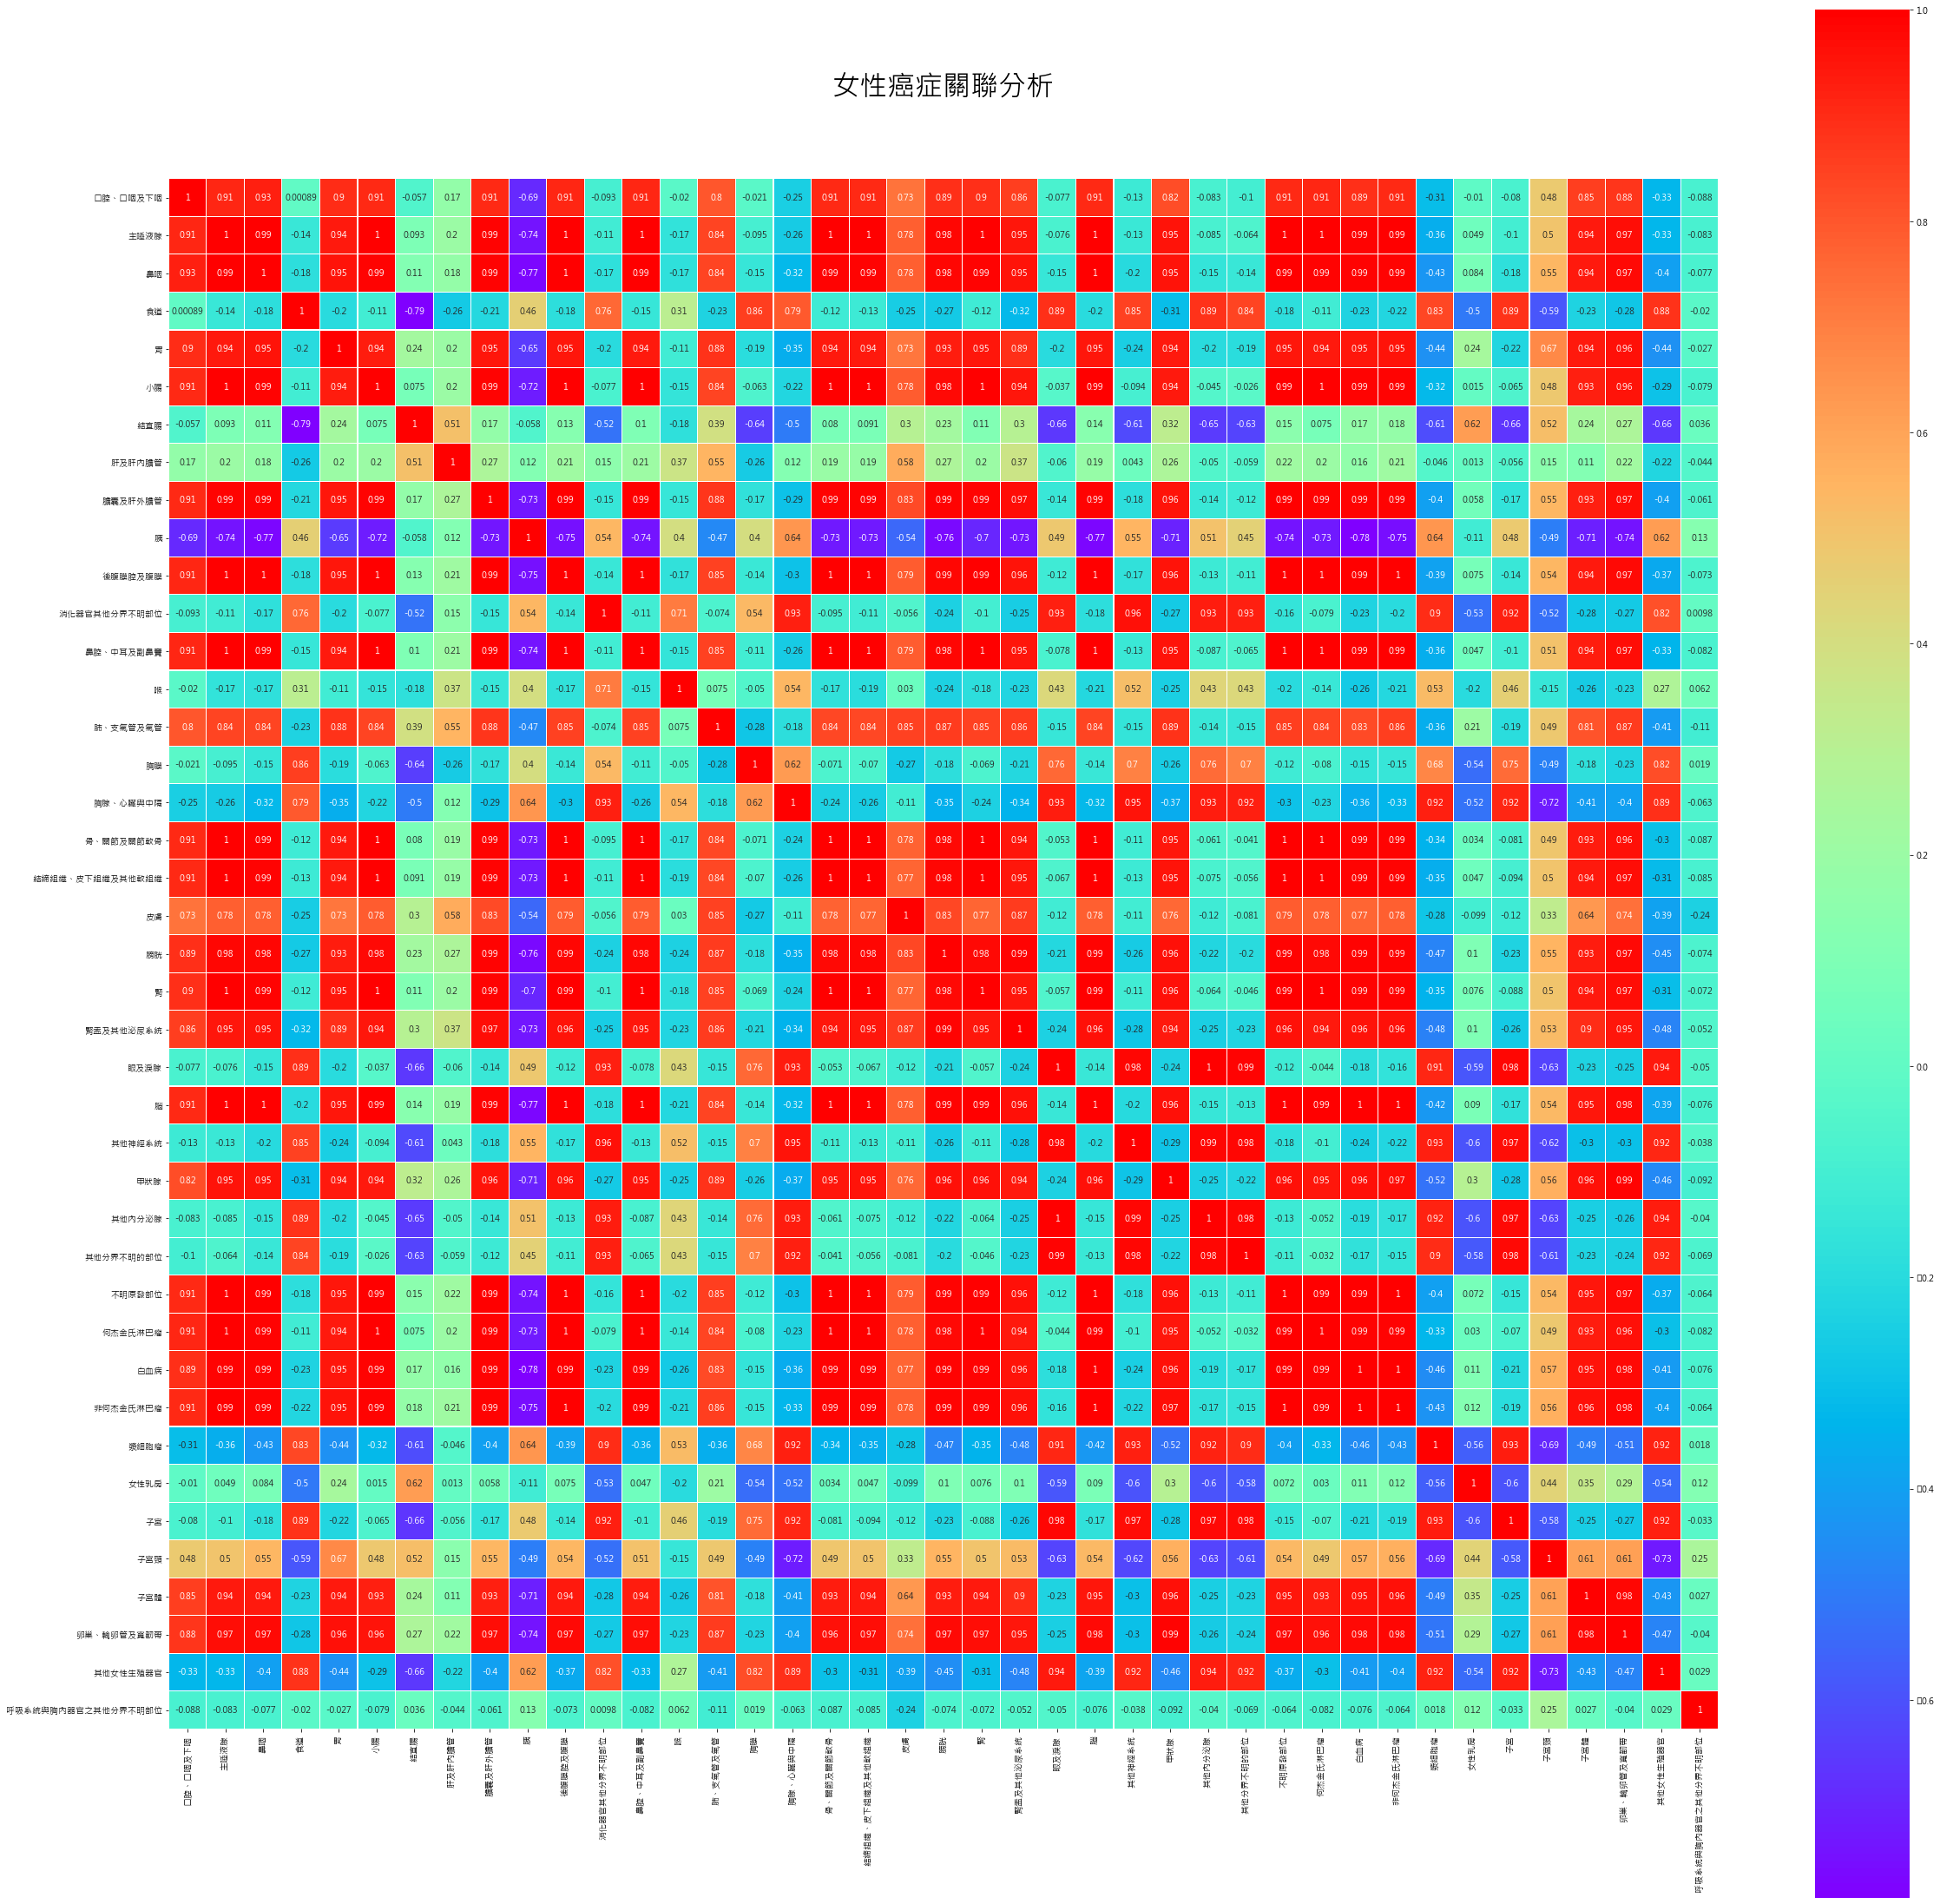

In [12]:
colormap = plt.cm.rainbow
plt.figure(figsize=(40,40))
plt.title('女性癌症關聯分析', y=1.05, size=32)
sns.heatmap(result.astype(float).corr(),linewidths=0.1,vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.savefig('../img/female_cancer_cor.png')